<a href="https://colab.research.google.com/github/DataMounster/DS-Unit-1-Sprint-2-Statistics/blob/master/Elif_Ayar_of_DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np


In [0]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

column_names=['A1','A2','A3','A4','A5','A6','A7','A8','A9',
              'A10','A11','A12','A13','A14','A15','A16']

credit_status=pd.read_csv(url, header=None, names=column_names,na_values='?' )

In [0]:
credit_status.shape

(690, 16)

In [0]:
credit_status.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


Number of rows and number of columns are matching witht the raw data. 
Row=690
Column=16

In [0]:
# let's check any missing information and missing data Nan with head, tail, and sample functions
print(credit_status.head(10))
print((credit_status).tail(10))


  A1     A2      A3 A4 A5  A6 A7     A8 A9 A10  A11 A12 A13    A14    A15 A16
0  b  30.83   0.000  u  g   w  v  1.250  t   t    1   f   g  202.0      0   +
1  a  58.67   4.460  u  g   q  h  3.040  t   t    6   f   g   43.0    560   +
2  a  24.50   0.500  u  g   q  h  1.500  t   f    0   f   g  280.0    824   +
3  b  27.83   1.540  u  g   w  v  3.750  t   t    5   t   g  100.0      3   +
4  b  20.17   5.625  u  g   w  v  1.710  t   f    0   f   s  120.0      0   +
5  b  32.08   4.000  u  g   m  v  2.500  t   f    0   t   g  360.0      0   +
6  b  33.17   1.040  u  g   r  h  6.500  t   f    0   t   g  164.0  31285   +
7  a  22.92  11.585  u  g  cc  v  0.040  t   f    0   f   g   80.0   1349   +
8  b  54.42   0.500  y  p   k  h  3.960  t   f    0   f   g  180.0    314   +
9  b  42.50   4.915  y  p   w  v  3.165  t   f    0   t   g   52.0   1442   +
    A1     A2      A3 A4 A5  A6  A7     A8 A9 A10  A11 A12 A13    A14  A15 A16
680  b  19.50   0.290  u  g   k   v  0.290  f   f    0   f   g 

In [0]:
credit_status.sample(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
404,b,34.00,5.085,y,p,i,bb,1.085,f,f,0,t,g,480.0,0,-
444,a,17.67,0.000,y,p,j,ff,0.000,f,f,0,f,g,86.0,0,-
560,a,25.00,12.330,u,g,cc,h,3.500,t,t,6,f,g,400.0,458,+
219,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,80.0,500,+
377,b,20.67,0.835,y,p,c,v,2.000,f,f,0,t,s,240.0,0,-
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444,+
165,a,40.83,10.000,u,g,q,h,1.750,t,f,0,f,g,29.0,837,+
425,b,24.58,1.250,u,g,c,v,0.250,f,f,0,f,g,110.0,0,-
620,b,22.17,2.250,u,g,i,v,0.125,f,f,0,f,g,160.0,10,-
587,b,51.58,15.000,u,g,c,v,8.500,t,t,9,f,g,0.0,0,+


In [0]:
credit_status.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

As I checked the data, I see some columns like  row 539, columns A6 and A7 have missing values and they are signed  as "?". Thus, I will replace them with Nan values.# thus, I will add the na_values='?' at the loading part above

In [0]:
credit_status.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

Thus, we could see all the missing information.



In [0]:
#Let's check the data types all
credit_status.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

column 11 and column 15 are supposed to be float data type. Let's change them


In [0]:
# let's change integer as float
int=12
float(int)

12.0

In [0]:
#let's write a function
def my_float(input):
  return float(input)
my_float(int)

12.0

In [0]:
# for Loop to run integer the entire columns

new_float=[]

for number in credit_status['A11']:
  new_float.append(my_float(number))
new_float[:10]

[1.0, 6.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [0]:
#let's change as a dataframe

In [0]:
credit_status['A11']=pd.Series(new_float)
credit_status['A11'].dtype


dtype('float64')

It works. Let's do columns 15 as float type too

In [0]:

new_float2=[]

for number in credit_status['A15']:
  new_float2.append(my_float(number))
new_float2[:10]

[0.0, 560.0, 824.0, 3.0, 0.0, 0.0, 31285.0, 1349.0, 314.0, 1442.0]

In [0]:
credit_status['A15']=pd.Series(new_float2)

In [0]:
credit_status['A15'].dtype

dtype('float64')

In [0]:
# Let's check the columns one by one to see, that type of object?
credit_status['A1'].dtypes

dtype('O')

In [0]:
credit_status['A4'].dtypes

dtype('O')

In [0]:
credit_status['A9'].dtypes

dtype('O')

Looks like, all the columns which are signed as object has str data type

In [0]:
type(credit_status["A1"] [0])

str

To sum up, I load the data, change the column names, replace all '?' values as Nan. I check the data shape and compare with raw data columns and row numbers. As a last part, I check the columns data type and columns A11 and A15 were supposed to be a float type instead of an integer. The data looks clean and ready to move  second part.

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
# I want to use A16 column with all other 6 continous feature
# Let's create two dataset based one 'approved' and one 'denied' 

credit_approved=credit_status[credit_status['A16']=='+']
credit_approved.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [0]:
credit_denied=credit_status[credit_status['A16']=='-']
credit_denied.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


In [0]:
# I will use the crosstab to check the relationship between columns
# First, I want to work on credit_approved dataframe

sample_a=pd.crosstab(credit_approved['A11'],credit_approved['A16'])

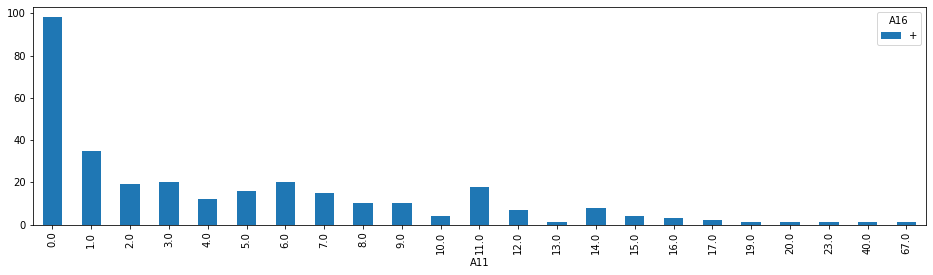

In [0]:
sample_a.plot(kind='bar', figsize=(16,4));

In [0]:
sample_b=pd.crosstab(credit_approved['A15'],credit_approved['A16'])

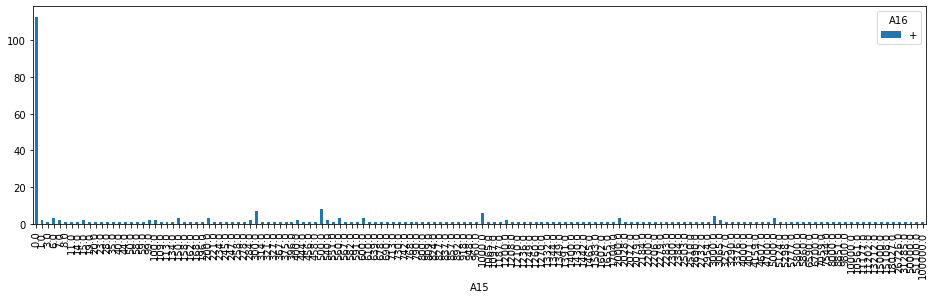

In [0]:
sample_b.plot(kind='bar', figsize=(16,4));

In [0]:
sample_c=pd.crosstab(credit_approved['A2'],credit_approved['A16'])

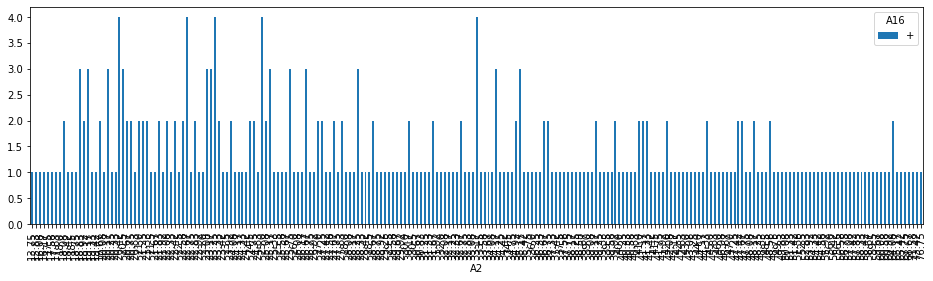

In [0]:
sample_c.plot(kind='bar', figsize=(16,4));

In [0]:
sample_d=pd.crosstab(credit_approved['A8'],credit_approved['A16'])

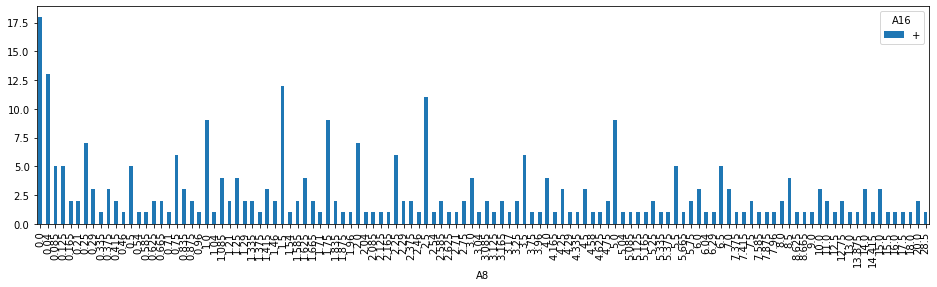

In [0]:
sample_d.plot(kind='bar', figsize=(16,4));

After checking a few float type columns, I want to use two columns for ttest, "A8" and "A11" because less different values.

**T-TEST 1**

Null Hypothesis: There is no significant difference between credit_approved and credit_denied datasets.
Alternative: There are not equal and there is significant difference between means of two data sets.

In [0]:
from scipy.stats import ttest_ind, ttest_1samp,ttest_ind_from_stats


In [0]:
ttest_ind(credit_approved['A8'], credit_denied['A8'], nan_policy='omit')

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

Conclution, I am 95% confidence to say that there are significantly difference between two datasets, and I reject to null hypothesis.

T-TEST 2

Null Hypothesis: There is no significant difference between credit_approved and credit_denied datasets. Alternative: There are not equal and there is significant difference between means of two data sets.

In [0]:
ttest_ind(credit_approved['A11'], credit_denied['A11'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

I reject the null hypothesis with 95% confidence, and I can conclude that there are a significant difference between approved credit with denied credit on the column A11

**Chi Squared Test**

In [0]:
credit_status.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [0]:
credit_status['A1'].value_counts()

b    468
a    210
Name: A1, dtype: int64

In [0]:
credit_status["A4"].value_counts()

u    519
y    163
l      2
Name: A4, dtype: int64

In [0]:
credit_status["A5"].value_counts()

g     519
p     163
gg      2
Name: A5, dtype: int64

In [0]:
credit_status["A7"].value_counts()

v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64

In [0]:
credit_status["A9"].value_counts()

t    361
f    329
Name: A9, dtype: int64

In [0]:
credit_status["A10"].value_counts()

f    395
t    295
Name: A10, dtype: int64

In [0]:
credit_status["A12"].value_counts()

f    374
t    316
Name: A12, dtype: int64

In [0]:
credit_status["A13"].value_counts()

g    625
s     57
p      8
Name: A13, dtype: int64

In [0]:

import scipy.stats as stats
from scipy.stats import chisquare 

In [0]:
sample_1=pd.crosstab(credit_status['A1'],credit_status['A9'])
sample_1

A9,f,t
A1,,
a,96,114
b,223,245


Looking the crosstab between column A1 and A9

Null Hypothesis, there is no significant difference between the means of two columns
Alternative: There are significant difference between the two variable means

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(sample_1)
print(f"P-value: {p_value}")

P-value: 0.7012617877873799


Conclusion, P-value is above the 0.05, thus I can refuse to reject the Null Hypothesis.

In [0]:
sample_2=pd.crosstab(credit_status['A4'],credit_status['A5'])
sample_2

A5,g,gg,p
A4,,,
l,0,2,0
u,519,0,0
y,0,0,163


Looking the crosstab between column A4 and A5

Null Hypothesis, there is no significant difference between the means of two columns Alternative: There are significant difference between the two variable means

In [0]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(sample_2)
print(f"P-value: {p_value}")

P-value: 6.001571019304877e-295


I am 95% confidence to say that there is a sifnificant difference between the column A4 and A5, and I can reject the null hypothesis.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

**T-TEST 1**

Null Hypothesis: There is no significant difference between credit_approved and credit_denied datasets.
Alternative: There are not equal and there is significant difference between means of two data sets.


Conclution, I am 95% confidence to say that there are significantly difference between two datasets, and I reject to null hypothesis.



**T-TEST 2**

Null Hypothesis: There is no significant difference between credit_approved and credit_denied datasets. Alternative: There are not equal and there is significant difference between means of two data sets.



I reject the null hypothesis with 95% confidence, and I can conclude that there are a significant difference between approved credit with denied credit on the column A11

**Chi Squared Test 1**

Looking the crosstab between column A1 and A9

Null Hypothesis, there is no significant difference between the means of two columns
Alternative: There are significant difference between the two variable means


Conclusion, P-value is above the 0.05, thus I can refuse to reject the Null Hypothesis

**Chi Squared Test 2**

Looking the crosstab between column A4 and A5

Null Hypothesis, there is no significant difference between the means of two columns Alternative: There are significant difference between the two variable means


I am 95% confidence to say that there is a sifnificant difference between the column A4 and A5, and I can reject the null hypothesis.

**- What was the most challenging part of this sprint challenge?**

I think every question was so fair and what we learned. No challenging to me

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



Frequentist statistics is only one samlpe distribution and we might make a conclusion about null hypothesis is right or not. Taking a sample from population, finding sample mean and confidence interval, we could drive the point that population mean should be between these two confidence interval numbers. If not, we can say 95% confidence, our null hypothesis on the population mean can be rejected. 

Bayesian has three steps. First step is a belief about population. Thus, we built  our first prior and likelihood function, and then we can create the model for belief about the data. Second step is that collection of data and use of our prior belief probabilit to update and check our model whether it is matching with original data or not. Then if the model we create is working, we can update the data with that model in order to understand and predict the posterior data and distribution. This is a good model to use predictive analysis and meachine learning. Bayesian is also based on categorical values and these categories's conditional probabilities to each other. 

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

**Part2 and part 3 )**

Confidence interval

I want to make a hypothesis 1

Null Hypothesis: Population mean of column A2 is  .25 

Alternative; the mean is .25



In [0]:
credit_approved.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [0]:
credit_approved.shape

(307, 16)

In [0]:
credit_denied.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0.0,t,s,420.0,0.0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0.0,t,g,980.0,0.0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0.0,f,s,400.0,0.0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0.0,f,g,160.0,2.0,-


In [0]:
credit_approved.shape

(307, 16)

In [0]:
import scipy.stats as stats



Before I start ttest confidence interval, I want to check column A1 type again.

In [0]:
credit_status.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [0]:
credit_status['A2'].dtypes

dtype('float64')

Data type is float, let's check there is any Nan values or not because it can affect the data type of columns A1



In [0]:
credit_status['A2'].isnull().sum()

12

In [0]:
# Let's remove the nan values

credit_new=credit_status['A2']
credit_new.head()

0    30.83
1    58.67
2    24.50
3    27.83
4    20.17
Name: A2, dtype: float64

In [0]:
credit_new=credit_new.dropna(axis=0,inplace=False)
credit_new.isnull().sum()

0

In [0]:
# This is the time to use function for CI
confidence=0.95
def confidence_interval(credit, CI):
  mean=np.mean(credit)
  n=len(credit)
  stderr = np.std(credit, ddof=1)/np.sqrt(n)
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - moe, mean + moe)
confidence_interval(credit_new,confidence)

(31.56817109144546, 30.666467255653455, 32.46987492723747)

To sum up, mean is 31.56, and confidence interval is 30.666 and 32.4698. Let's put all those numbers on the graph and analysis what it going on.

In [0]:
import matplotlib.pyplot as plt

import seaborn as sns



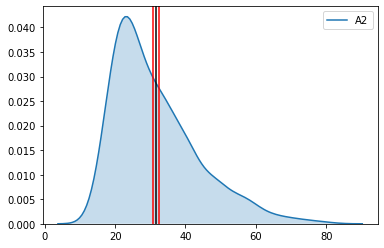

In [0]:
sns.kdeplot(credit_new, shade=True)
CI=confidence_interval(credit_new,confidence)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=credit_new.mean(), color='k');

I want to create a hypthesis and check which its mean is outside of the CI. Then, I will check the null hypothesis should be rejected or not.

Null Hypothesis: Population mean of column A2 is smaller than .25
Alternative; the mean is bigger than .25


In [0]:
ttest_1samp(CI, 0.25)

Ttest_1sampResult(statistic=60.15796027181455, pvalue=0.0002762064610866885)

p-value is smaller than 0.05, so I can reject the hypothesis with 95% confidence

I want to create second hypothesis.
Null hypothesis: the mean of population on the column A8 is 30%
Alternative: the mean of population on the column A8 is  30%

In [0]:
credit_status["A8"].isnull().sum()

0

In [0]:
credit_status['A8'].dtype

dtype('float64')

looks good. Let's use the same function above to find mean and CI

In [0]:
Credit_status_A8=confidence_interval(credit_status["A8"], confidence)
Credit_status_A8

(2.2234057971014476, 1.973267792923421, 2.473543801279474)

Based on the hyppthesis, I said mean is less than 30%, so and mean is not even between CI. I can reject the hypothesis again. Let's check with ttest_samp1

In [0]:
ttest_1samp(Credit_status_A8, 0.3)

Ttest_1sampResult(statistic=13.318394280387697, pvalue=0.005590395374979883)

p-value is smaller than 0.05

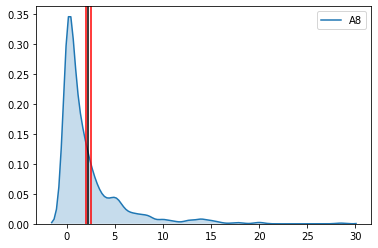

In [0]:
sns.kdeplot(credit_status['A8'], shade=True)

plt.axvline(x=Credit_status_A8[1], color='red')
plt.axvline(x=Credit_status_A8[2], color='red')
plt.axvline(x=credit_status['A8'].mean(), color='k');

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.